https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

Using Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Data Exploration

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

Preprocessing the data

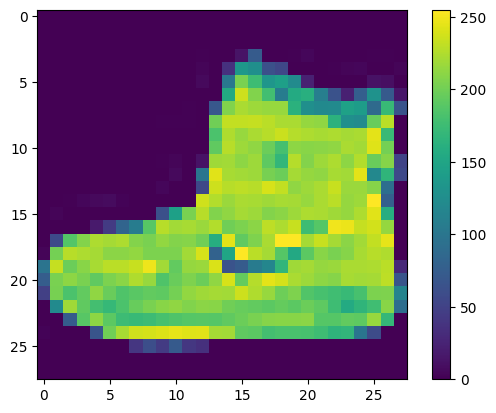

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

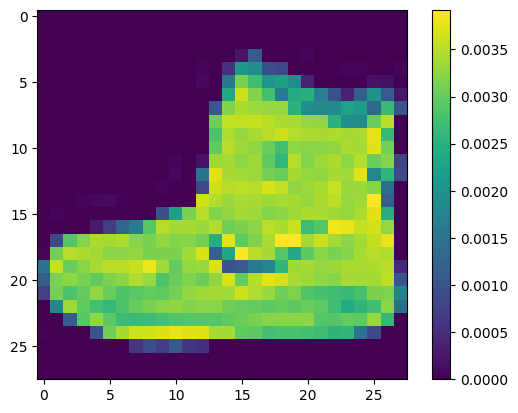

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

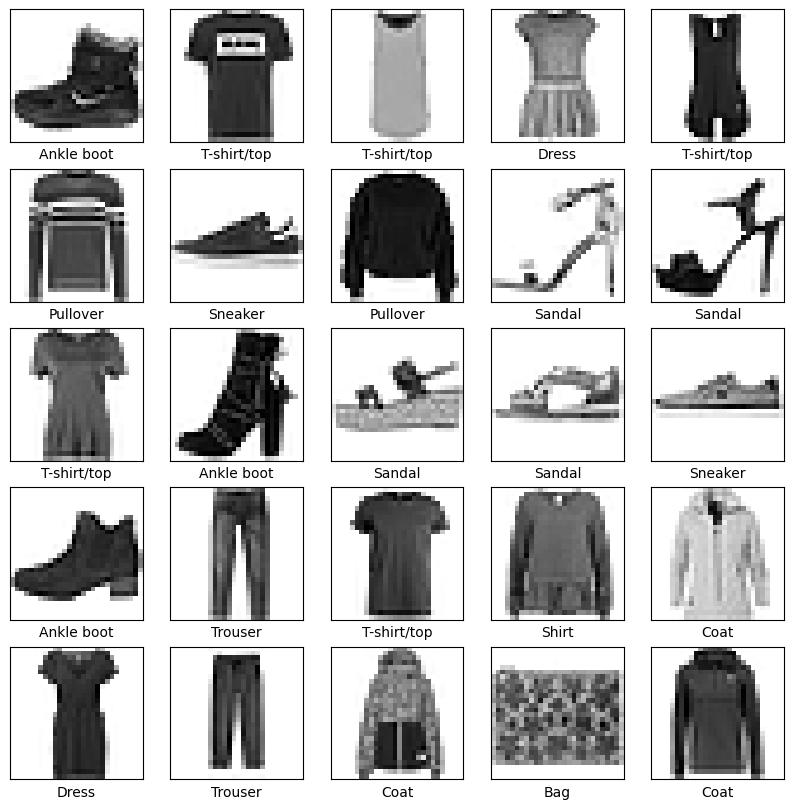

In [23]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build The Model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Model Compile

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0905 - accuracy: 0.6686
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6419 - accuracy: 0.7703
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5670 - accuracy: 0.7957
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5250 - accuracy: 0.8153
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4978 - accuracy: 0.8242
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4786 - accuracy: 0.8311
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4643 - accuracy: 0.8377
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4532 - accuracy: 0.8408
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4438 - accuracy: 0.8446
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4

Evaluate accuracy

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4646 - accuracy: 0.8326 - 342ms/epoch - 1ms/step

Test accuracy: 0.8325999975204468


Make Prediction

In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 839us/step


In [30]:
predictions[0]

array([3.1401513e-07, 6.7449690e-08, 6.2293325e-06, 3.4655120e-06,
       5.3847380e-06, 1.5258420e-01, 1.2581749e-05, 2.9198277e-01,
       3.9562960e-03, 5.5144870e-01], dtype=float32)

In [32]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

Define functions to graph the full set of 10 class predictions.

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify Prediction

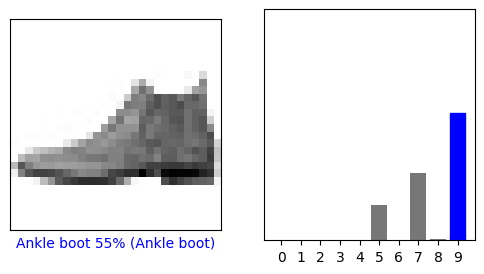

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

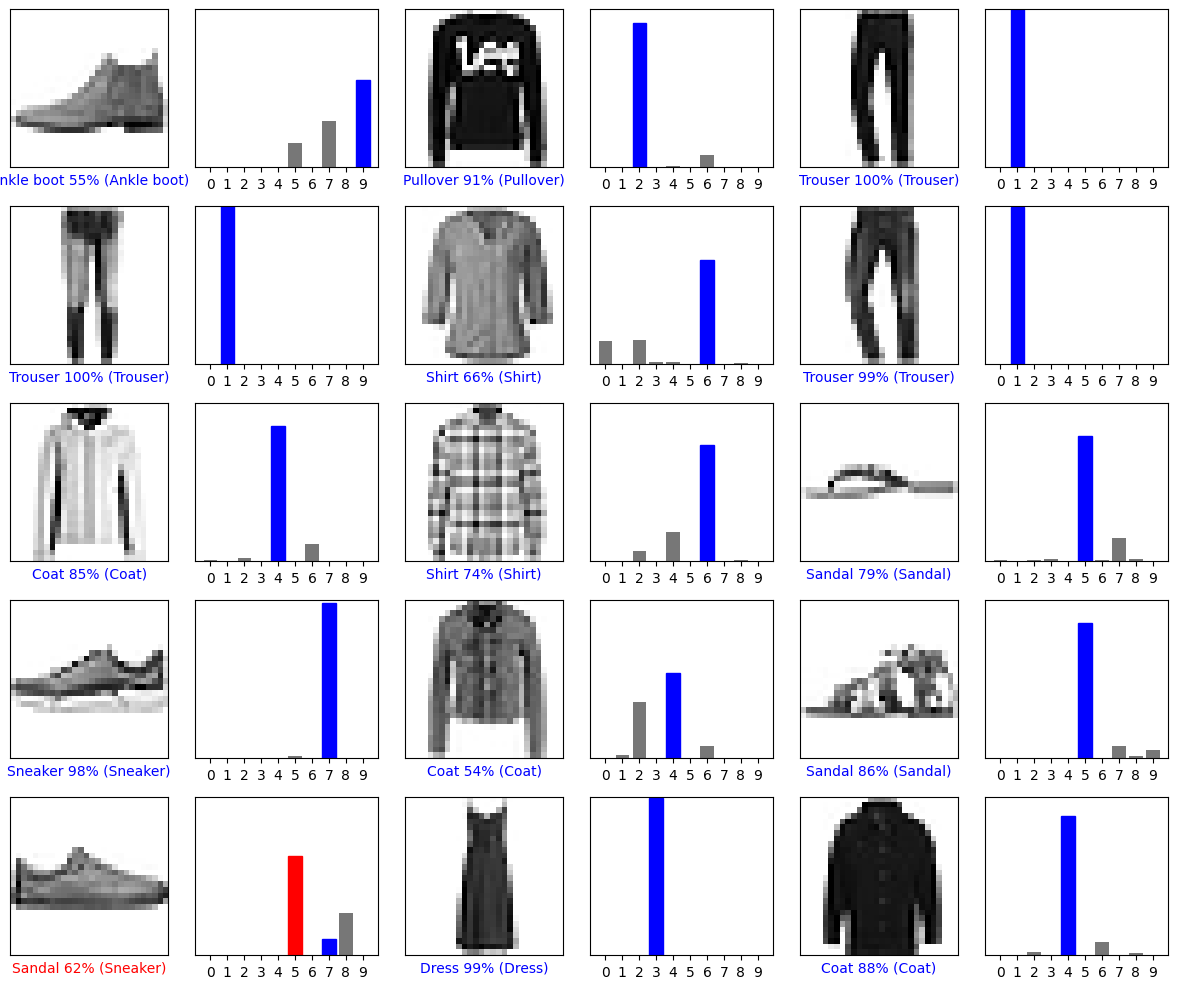

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the Trained Model

In [38]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[2.3445488e-04 3.1578036e-06 9.1441000e-01 1.8599490e-05 9.4409352e-03
  2.7145156e-10 7.5857699e-02 1.2730333e-16 3.5102203e-05 3.0253538e-12]]


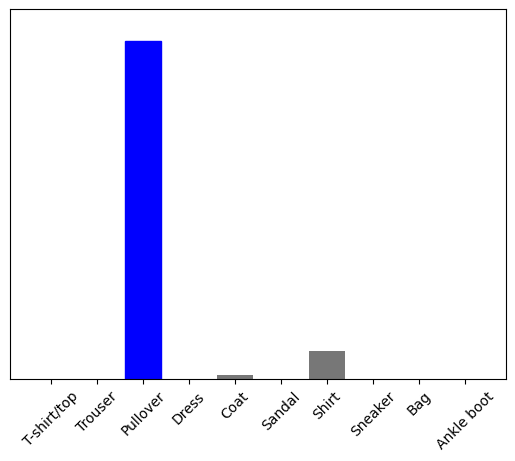

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [42]:
class_names[np.argmax(predictions_single[0])]

'Pullover'